In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\analyst_rating_with_topic.csv')


In [2]:
import sys
import os

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))


In [3]:
df = df.copy()
df['publish_hour'] = pd.to_datetime(df['date']).dt.hour
    
    # Create 3-hour bins
bins = range(0, 25, 3)
labels = [f"{str(i).zfill(2)}:00-{str(i+2).zfill(2)}:59" for i in bins[:-1]]
df['publish_bin'] = pd.cut(df['publish_hour'], bins=bins, labels=labels, right=True, include_lowest=True)
    
bin_counts = df['publish_bin'].value_counts().sort_index()

## Analyzing News Article Publication Times in 3-Hour Bins
Understanding when news articles are published throughout the day can reveal patterns—such as whether certain time windows see more news drops, which is crucial for market reaction analysis and real-time trading automation.
Below, we analyze the distribution of article publication times using 3-hour intervals.

Step-by-Step Explanation
1. ### Copy the DataFrame
We start by copying the original DataFrame to prevent unintentional modifications:
This is a best practice to keep your original data intact.

2. ###  Extract the Hour from the Datetime
We convert the 'date' column to datetime and extract the hour (0–23) for each article:


Now, each row has an integer representing the hour the article was published.

3. ### Define 3-Hour Time Bins
We set up bins representing 3-hour windows (e.g., 00:00–02:59, 03:00–05:59, ..., 21:00–23:59):

labels creates user-friendly labels for each time window.

4. ### Assign Each Article to a Time Bin
We use pd.cut to categorize each article by its publish hour:

Each article now has a publish_bin value indicating which 3-hour window it falls into.

5. ### Count the Number of Articles in Each Bin
We count how many articles fall into each 3-hour bin and sort them chronologically:

This Series, bin_counts, shows the frequency of publication in each time window.

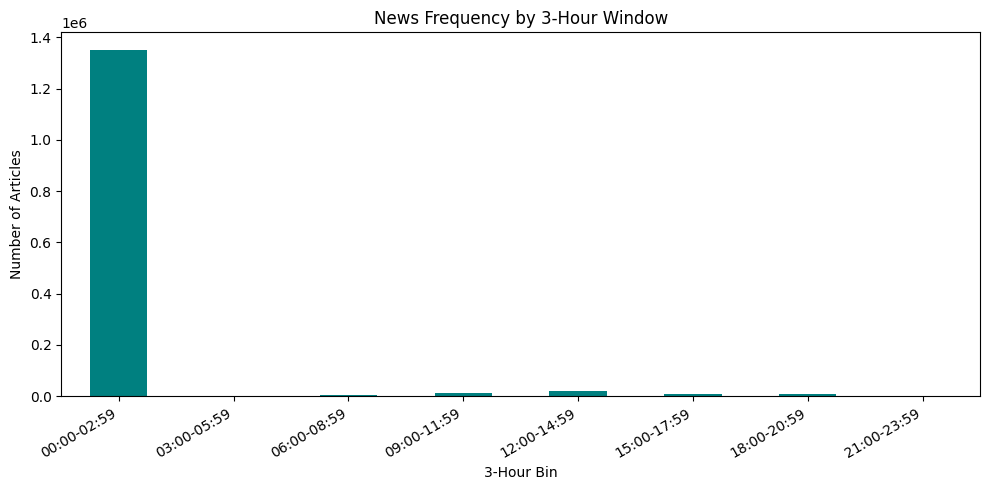

In [4]:
from src.visualization import plot_bar

plot_bar(
    bin_counts,
    title="News Frequency by 3-Hour Window",
    xlabel="3-Hour Bin",
    ylabel="Number of Articles",
    color="teal",
    rotation=30
)


The spike from 00:00–02:59 could be due to:

Scheduled press releases (some companies release earnings after market close or before market open)

Breaking overnight news

Batch publication by major financial news sources

In [5]:
# Filter for articles published between 00:00 and 02:59
spike_bin = "00:00-02:59"
df_spike = df[df['publish_bin'] == spike_bin]

# Optional: print a few headlines and dates for manual review
print(df_spike[['date', 'headline', 'publisher']].head(10))


                   date                                           headline  \
10  2020-05-22 00:00:00    30 Stocks Moving in Friday's Pre-Market Session   
11  2020-05-22 00:00:00  SVB Leerink Maintains Outperform on Agilent Te...   
12  2020-05-21 00:00:00  8 Stocks Moving In Thursday's After-Hours Session   
13  2020-05-21 00:00:00  Agilent Technologies shares are trading higher...   
14  2020-05-21 00:00:00  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
15  2020-05-21 00:00:00                Earnings Scheduled For May 21, 2020   
16  2020-05-18 00:00:00  Agilent Technologies Receives FDA Approval for...   
17  2020-05-16 00:00:00  Q1 13F Roundup: How Buffett, Einhorn, Ackman A...   
18  2020-05-15 00:00:00  Pershing Square 13F Shows Fund Raises Stake In...   
19  2020-05-08 00:00:00  How Bill Ackman Successfully Navigated Coronav...   

                  publisher  
10               Lisa Levin  
11  vishwanath@benzinga.com  
12             Tyree Gorges  
13        Benzinga Ne

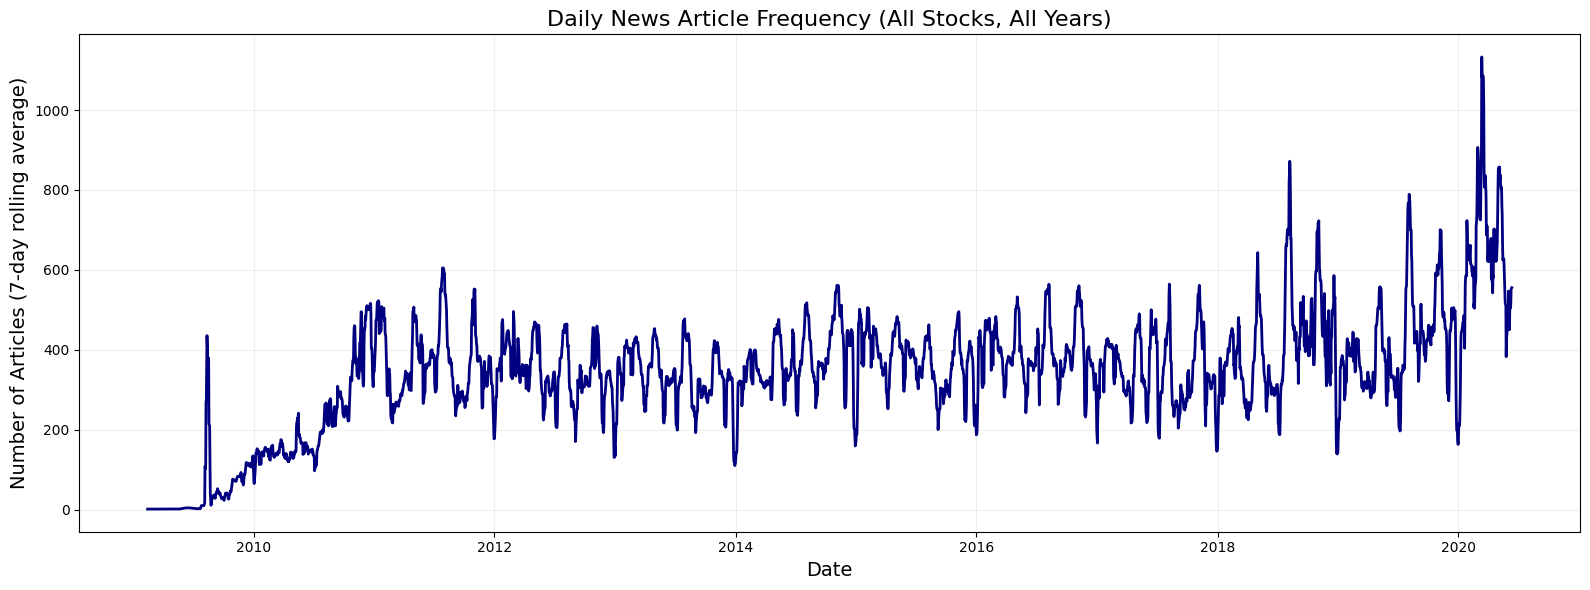

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Parse 'date' column if needed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2. Group by date (all stocks, all years)
daily_counts = df.groupby(df['date'].dt.date).size()

# 3. Smooth with a 7-day rolling mean to reveal trends
daily_counts_rolling = daily_counts.rolling(window=7, min_periods=1).mean()

# 4. Plot
plt.figure(figsize=(16, 6))
plt.plot(daily_counts_rolling.index, daily_counts_rolling.values, color='navy', linewidth=2)
plt.title('Daily News Article Frequency (All Stocks, All Years)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Articles (7-day rolling average)', fontsize=14)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [7]:
# Filter for articles published between 00:00 and 02:59
spike_bin = "00:00-02:59"
df_spike = df[df['publish_bin'] == spike_bin]

# Count top stocks posted about in that time range
top_stocks = df_spike['stock'].value_counts().head(10)
print("Top stocks posted between 00:00 and 02:59:")
print(top_stocks)


Top stocks posted between 00:00 and 02:59:
stock
MRK     3323
MS      3228
NVDA    3136
MU      3132
QQQ     3096
NFLX    3018
M       3015
EBAY    3008
GILD    2958
VZ      2956
Name: count, dtype: int64


In [8]:
# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter for the year 2020
df_2020 = df[df['date'].dt.year == 2020]

# Count top 10 stocks by frequency in 2020
top_10_stocks_2020 = df_2020['stock'].value_counts().head(10)
print("Top 10 stocks mentioned in 2020:")
print(top_10_stocks_2020)


Top 10 stocks mentioned in 2020:
stock
TSLA     1142
FXI       797
GOOGL     514
GILD      482
INO       480
AAPL      441
GOOG      439
UAL       398
NFLX      389
DAL       385
Name: count, dtype: int64


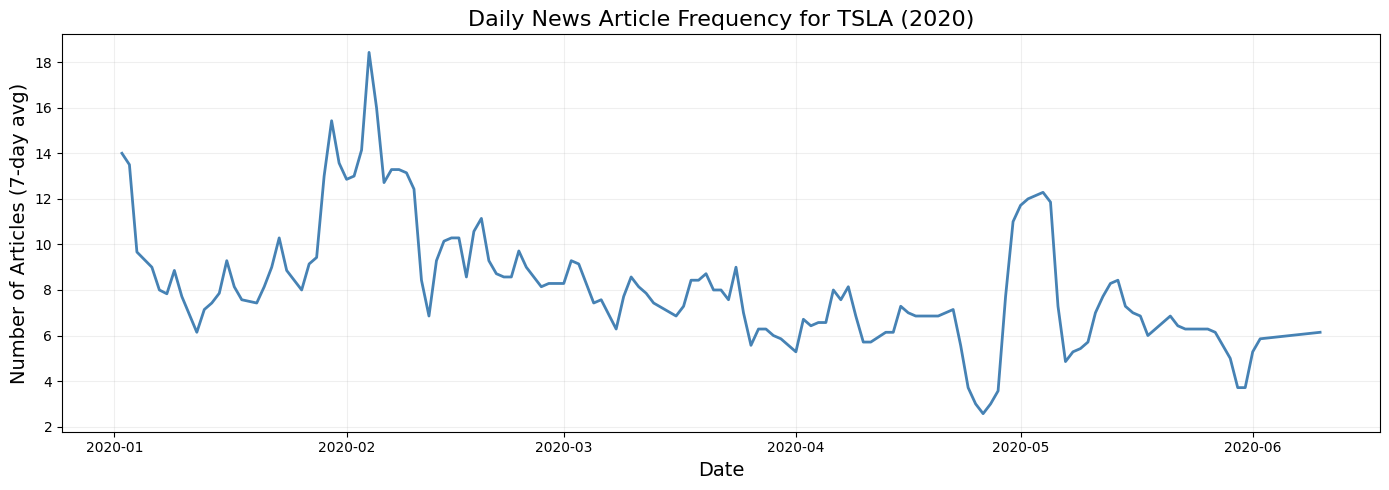

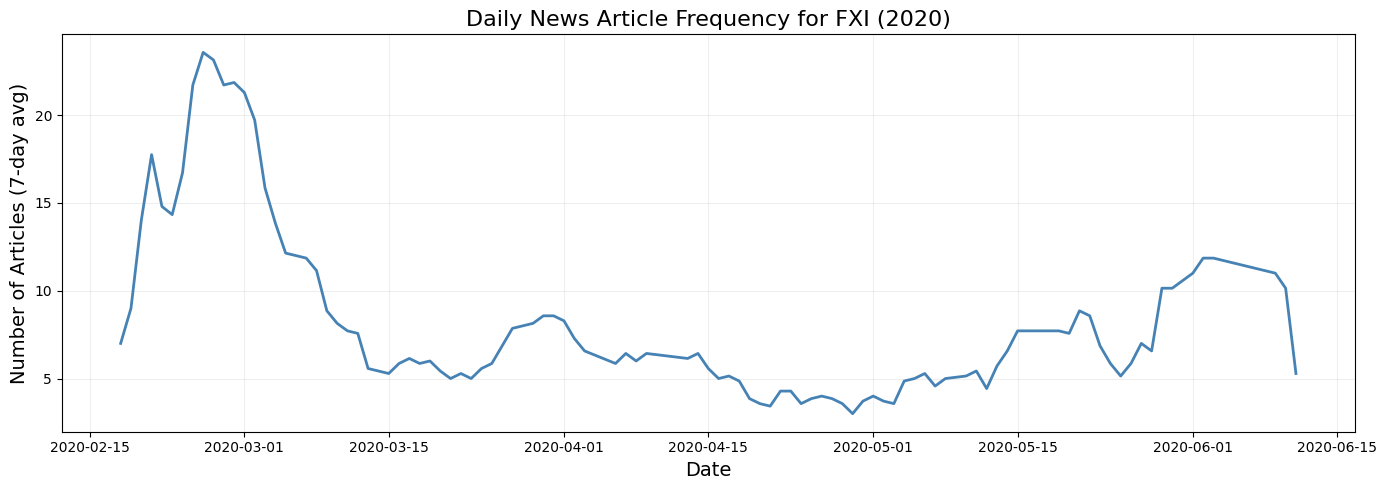

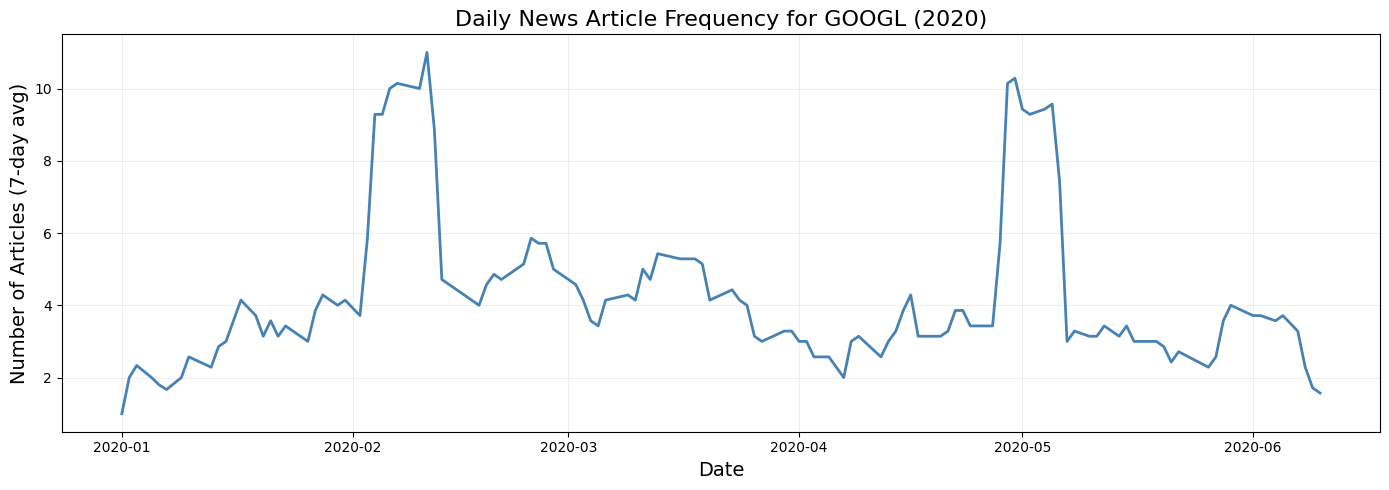

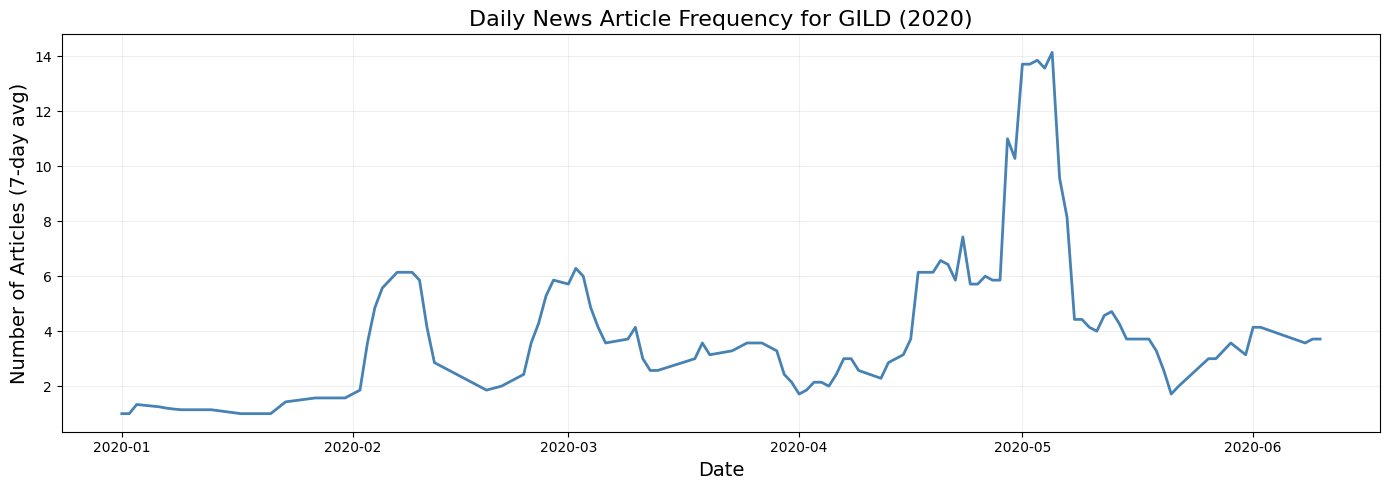

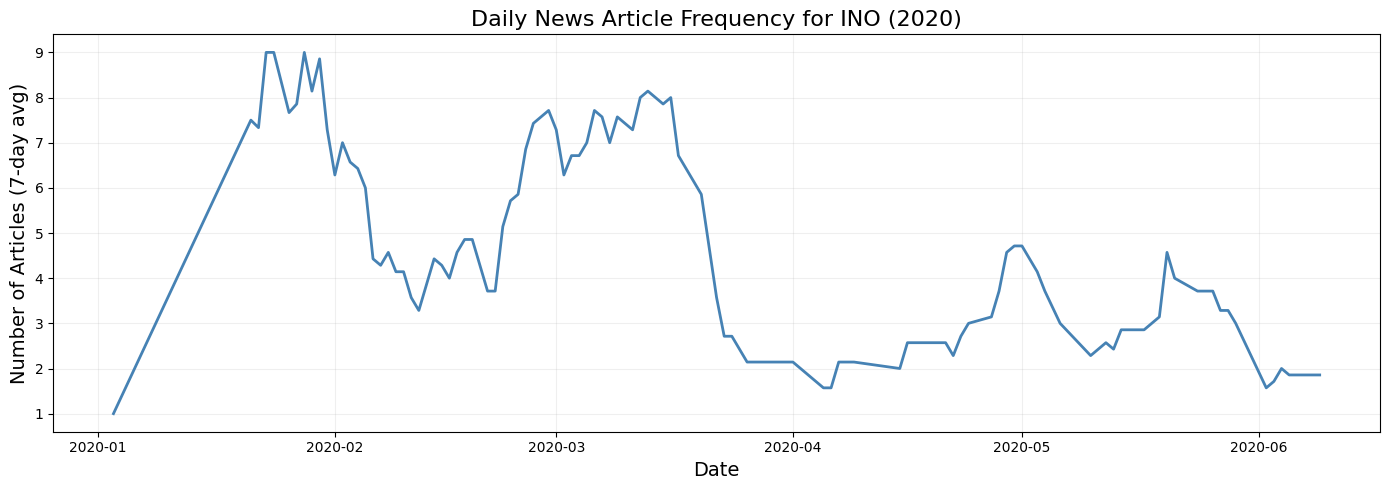

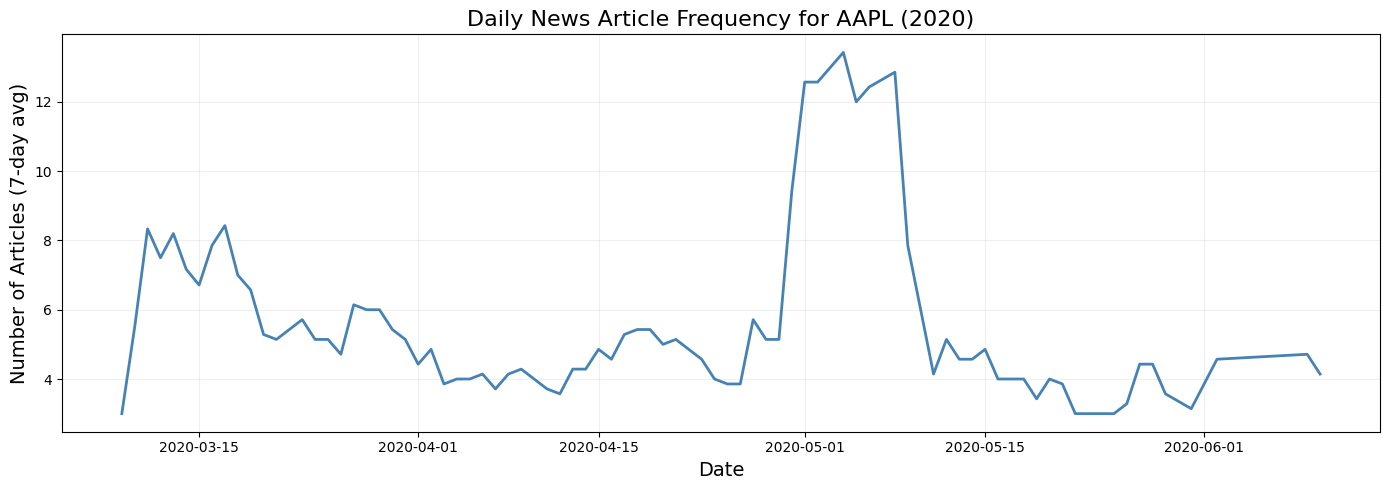

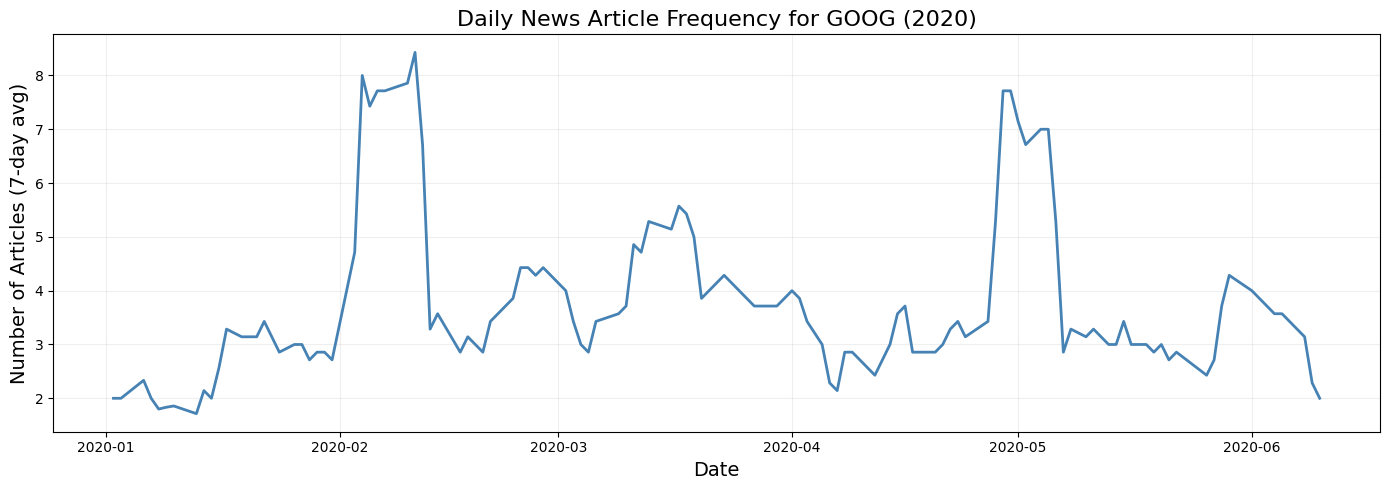

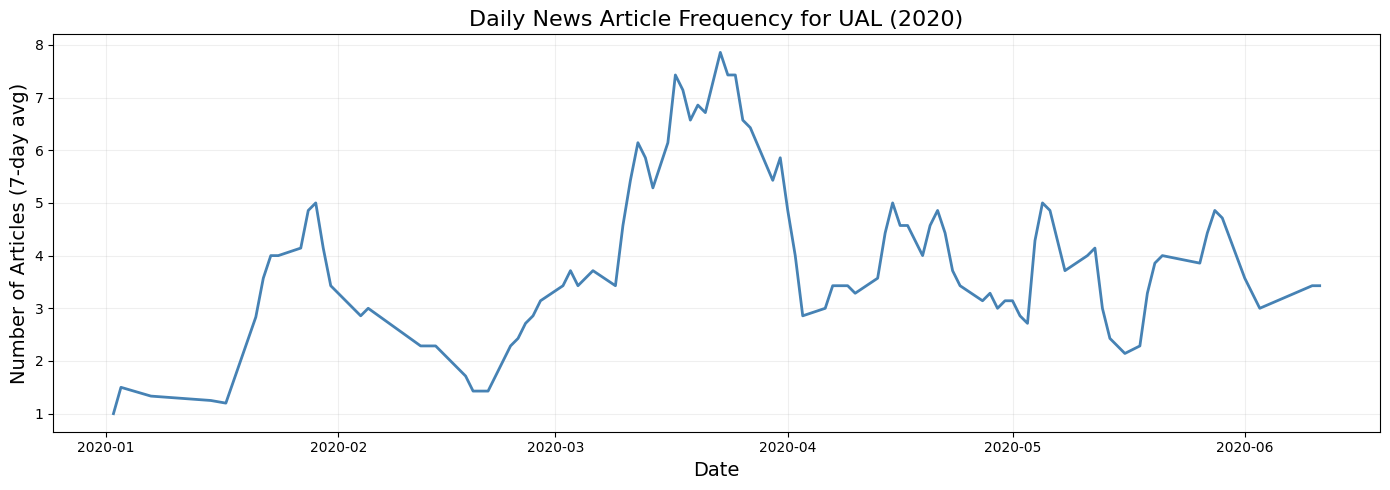

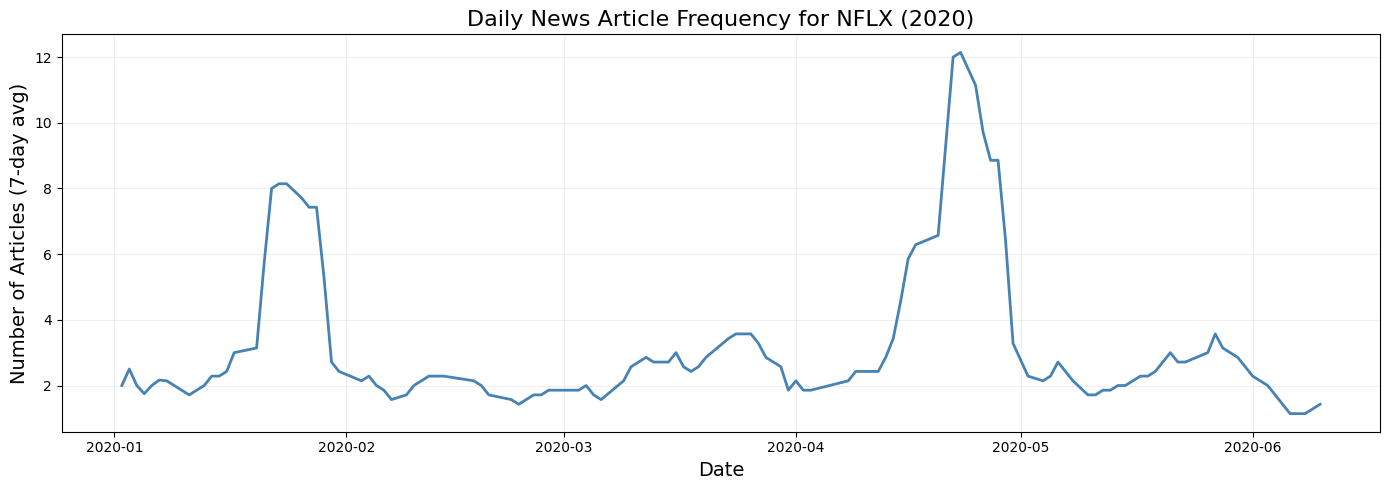

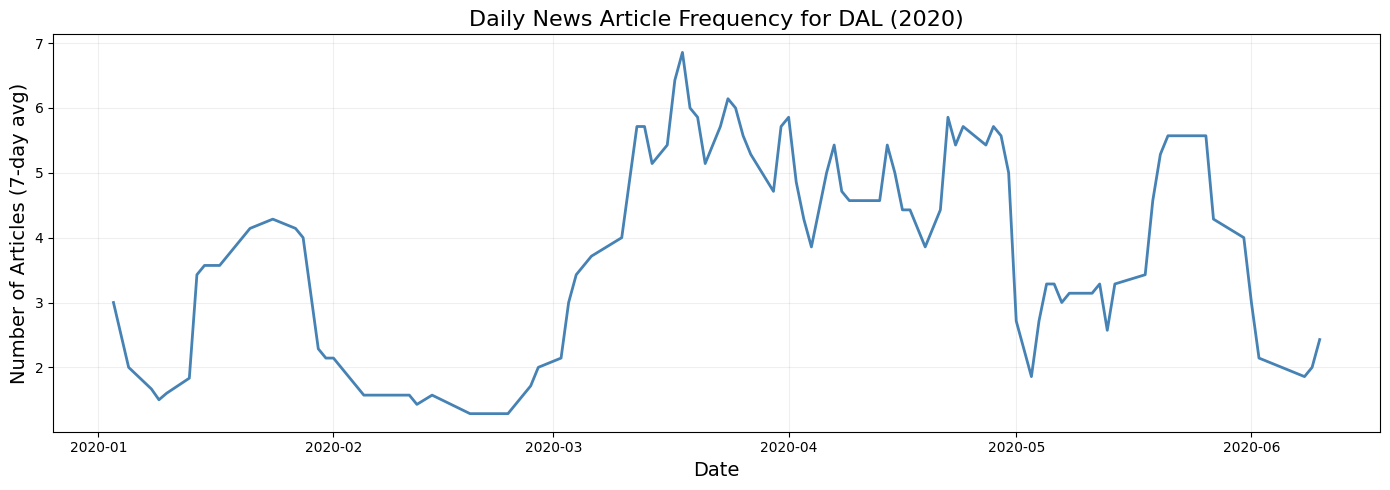

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Parse the date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2. Filter for 2020
df_2020 = df[df['date'].dt.year== 2020]

# 3. Get the top 10 stocks by article frequency in 2020
top_10_stocks = df_2020['stock'].value_counts().head(10).index

# 4. Plot time series for each stock separately
for stock in top_10_stocks:
    df_stock = df_2020[df_2020['stock'] == stock]
    # Count articles per day
    daily_counts = df_stock.groupby(df_stock['date'].dt.date).size()
    # Smooth with rolling mean (7 days)
    daily_counts_rolling = daily_counts.rolling(window=7, min_periods=1).mean()
    
    plt.figure(figsize=(14, 5))
    plt.plot(daily_counts_rolling.index, daily_counts_rolling.values, color='steelblue', linewidth=2)
    plt.title(f'Daily News Article Frequency for {stock} (2020)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Articles (7-day avg)', fontsize=14)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()



Around May 2020, the stock market showed significant activity. There were strong gains, with the market experiencing its best month since 1987 in April 2020. This was fueled by optimism regarding the reopening of the economy and potential coronavirus vaccine developments. Big tech companies like Apple, Amazon, and Netflix led gains in subsequent months, indicating a shift in market dynamics.


stock
MRK     3323
MS      3228
NVDA    3136
MU      3132
QQQ     3096
NFLX    3018
M       3015
EBAY    3008
GILD    2958
VZ  

The stocks i listed—such as MRK (Merck), MS (Morgan Stanley), NVDA (Nvidia), MU (Micron), NFLX (Netflix), and others—are from diverse sectors, including healthcare, technology, finance, and consumer services that got top news in 2020 (inflation time). Their movement during the period around May 2020 was influenced by broader market trends, economic recovery hopes, and sector-specific factors.

Key points about their relation to market movements:
Tech stocks (NVDA, QQQ, NFLX) gained significantly as investors sought growth opportunities amid economic uncertainty.
Healthcare stocks (MRK, GILD) often act as defensive stocks, gaining stability and growth due to ongoing health concerns.
Semiconductor stocks (MU, NVDA) surged with the rising demand for electronic devices, cloud computing, and data centers.
Financials (MS, VZ) showed mixed performance; some financial firms benefited from market activity, while telecoms like VZ offered stability.
Overall relation:
These stocks collectively reflect investor confidence and risk appetite during the recovery phase post the initial COVID-19 pandemic shock. Tech and health-related sectors especially drove the market rally, aligning with the broader market movement of late 2020.

In [10]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("Top 10 publishers by article count:")
print(publisher_counts.head(10))


Top 10 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [11]:
# Count number of articles per topic for each publisher
publisher_topic_counts = (
    df.groupby(['publisher', 'topic'])
    .size()
    .unstack(fill_value=0)
)

print("Sample publisher-topic counts:")
print(publisher_topic_counts.head())


Sample publisher-topic counts:
topic             Company Events/Announcements  Dividends/Splits/Buybacks  \
publisher                                                                   
47ertrends                                   0                          0   
AARP                                         0                          0   
ABNNewswire                                  1                          0   
Aakin                                        0                          0   
Aaron Jackson.Ed                             0                          0   

topic             Earnings & Estimates  FDA & Regulatory  \
publisher                                                  
47ertrends                           0                 0   
AARP                                 0                 0   
ABNNewswire                          0                 0   
Aakin                                0                 0   
Aaron Jackson.Ed                     0                 0   

topic   

### Publisher Names Are Email Addresses: Extract and Analyze Domains

In [12]:
import re

def extract_domain(publisher):
    # Simple regex for extracting domain from email
    match = re.search(r'@([\w\.-]+)', str(publisher))
    return match.group(1) if match else None

# Create a new column for domain (only for publishers with email addresses)
df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count number of articles per domain (for email publishers only)
domain_counts = df['publisher_domain'].value_counts()
print("Top publisher domains (from email addresses):")
print(domain_counts.head(10))


Top publisher domains (from email addresses):
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


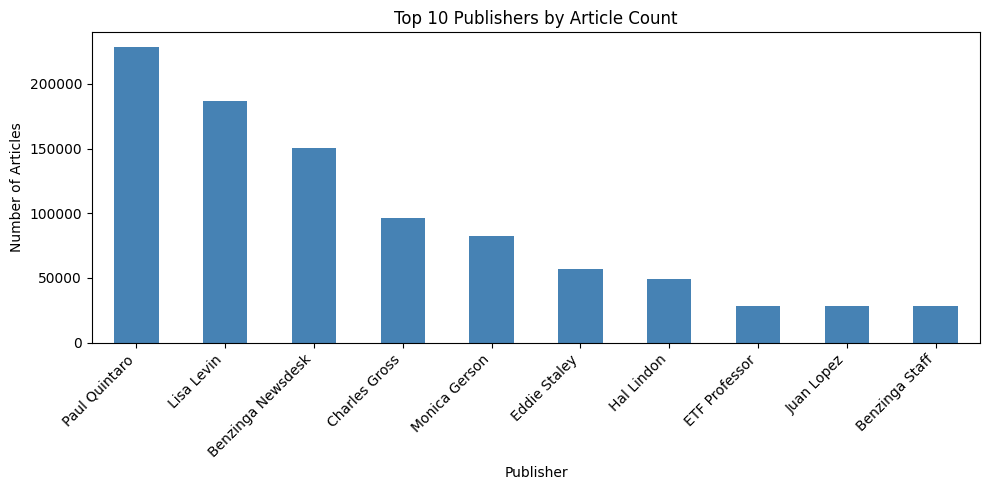

In [13]:
import matplotlib.pyplot as plt

publisher_counts.head(10).plot(kind='bar', figsize=(10,5), color='steelblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Top Publisher per Topic

To identify the leading publisher for each topic, we group the data by the `topic` column and count the occurrences of each publisher within those groups. The publisher with the highest article count for each topic is selected as the top publisher for that topic.

Here’s how to do it in pandas:

```python

In [14]:

top_publishers_by_topic = (
    df.groupby('topic')['publisher']
    .value_counts()
    .groupby(level=0)
    .head(1)
    .reset_index(level=1, name='count')
)
print(top_publishers_by_topic)


                                           publisher  count
topic                                                      
Company Events/Announcements           Paul Quintaro  18885
Dividends/Splits/Buybacks              Paul Quintaro   6165
Earnings & Estimates                   Paul Quintaro  59788
FDA & Regulatory                       Paul Quintaro   5511
Market/Trading Activity            Benzinga Newsdesk  43194
Mergers/Acquisitions/Partnerships      Paul Quintaro   9032
Other                                     Lisa Levin  79661
Price Targets & Analyst Ratings        Paul Quintaro  43545
Product/Innovation                     Charles Gross   1790
Sales/Revenue/Guidance                 Paul Quintaro  19639
Sector/Company Specific                Paul Quintaro   5151
